# Project diabetes prediction using M.L.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore and Clean the Data

In [ ]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (768, 9)

Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0

In [ ]:
import numpy as np

# Columns where 0 is invalid
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Check how many missing values now
print("\nMissing values after replacement:")
print(df.isnull().sum())



Missing values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Confirm no missing values
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Data Preprocessing and Splitting

In [ ]:
# Split features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Check shape
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (614, 8)
Testing set size: (154, 8)


# Logistic reggression model


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Confusion Matrix:
[[82 17]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# Try Other Machine Learning Models

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.7402597402597403


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Create and train
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict
svm_pred = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.7467532467532467


# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
knn_pred = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.7337662337662337


# Visualize the Results

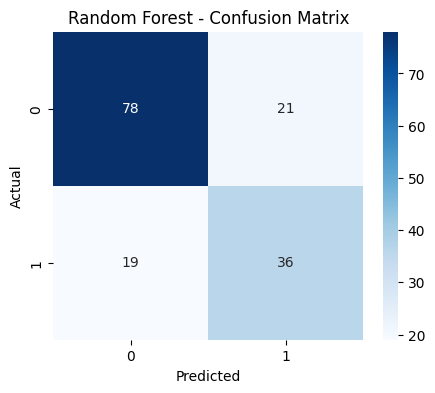

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest (or any model you want to analyze)
cm = confusion_matrix(y_test, rf_pred)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Feature Importance (only for Random Forest)

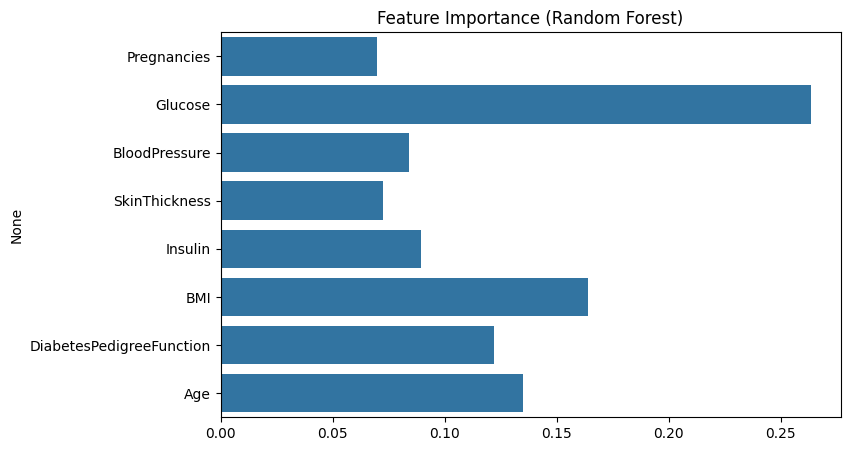

In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = df.columns[:-1]  # all except 'Outcome'

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


# ROC Curve and AUC (for binary classification)

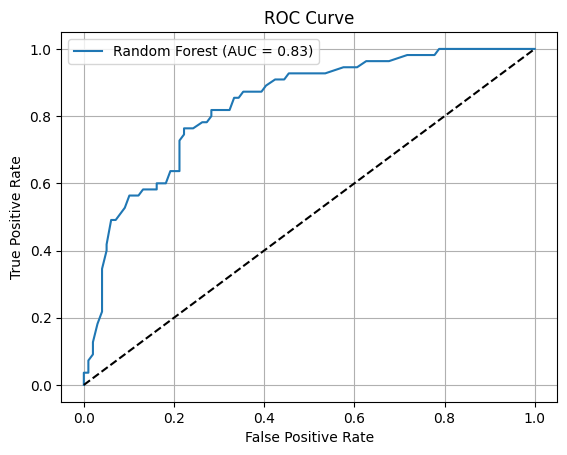

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
rf_probs = rf_model.predict_proba(X_test)[:,1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_probs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


# Saving the Model and Make Predictions

# Save the model using joblib

In [ ]:
import joblib

# Save the trained random forest model
joblib.dump(rf_model, 'diabetes_model.pkl')

# Save the scaler too
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved!")


Model and scaler saved!


# Load the model (optional — for use in apps or new sessions)



In [ ]:
# Load model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')


# Make prediction from user input

In [ ]:
Pregnancies: 2
Glucose: 120
BloodPressure: 70
SkinThickness: 25
Insulin: 79
BMI: 28.5
DiabetesPedigreeFunction: 0.25
Age: 35


In [ ]:
# New patient data (as a 2D array)
new_data = [[2, 120, 70, 25, 79, 28.5, 0.25, 35]]

# Scale the input using the saved scaler
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)

# Output result
if prediction[0] == 1:
    print("⚠️ This person is predicted to have diabetes.")
else:
    print("✅ This person is predicted NOT to have diabetes.")


✅ This person is predicted NOT to have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
